# 01. Preparing Notebook
# 02. Creating Bar Charts
# 03. Exporting Charts
# 04. Creating Histograms and Scatterplots
# 05. Creating Line Charts
# 05a. Sampling Data

## 01. Preparing Notebook

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement4\Instacart Basket Analysis'

In [3]:
# importing orders_products_2.pkl
ords_prods_merge = pd.read_pickle (os.path.join (path, '02 Data','Prepared Data','orders_products_2.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range products,Regularly busy,Regularly busy,Average orders,10,New customer,6.320,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range products,Regularly busy,Least busy,Average orders,10,New customer,5.900,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.640,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range products,Least busy,Least busy,Average orders,10,New customer,5.200,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range products,Least busy,Least busy,Most orders,10,New customer,7.125,Low spender,20.5,Non-frequent customer


## 02. Creating Bar Charts

<AxesSubplot:>

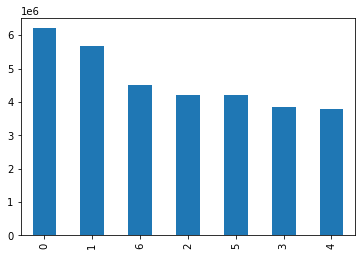

In [5]:
# creating bar chart for ords_prods_merge
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

In [6]:
# looking at the values for comparison
ords_prods_merge['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

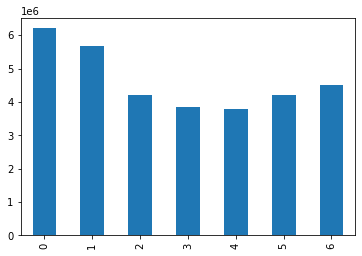

In [7]:
# sorting the barchart based on the index
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

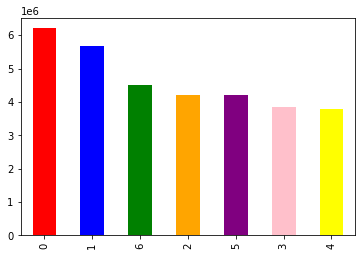

In [8]:
# bringing into the bar chart color
ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color=['red','blue','green','orange','purple','pink','yellow'])

## 03. Exporting Charts

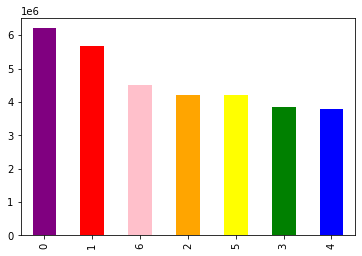

In [9]:
# saving the bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

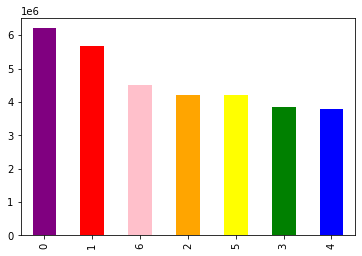

In [10]:
# access the new saved bar chart
bar.figure

In [17]:
# export an image file (.png) of the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

## 04. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

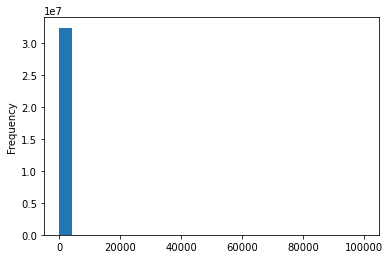

In [11]:
# creating a histogram for the column 'prices'
ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
# the chart does not look good
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
# mean
ords_prods_merge['prices'].mean()

11.980225638467232

In [14]:
# median
ords_prods_merge['prices'].median()

7.4

In [15]:
# max
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

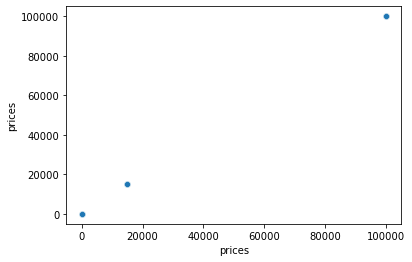

In [16]:
# scatterplot for further investigation
sns.scatterplot(x = 'prices', y ='prices', data = ords_prods_merge)

In [17]:
# weired values at arround 20.000 and 100.000
df = ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

In [18]:
# how many times does the data come?
df['prices'].value_counts(dropna = False)

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [19]:
# treat this data points as missing by changing them to 'NaN'
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [20]:
# checking if it worked
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

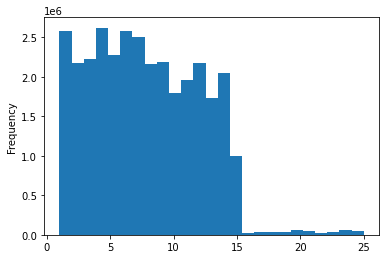

In [21]:
# creating a histogram for the column 'prices' after data cleaning
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

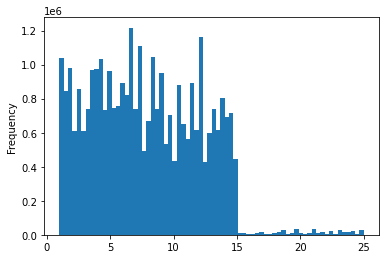

In [22]:
# increasing the granularity by increasing the bins
ords_prods_merge['prices'].plot.hist(bins = 70)

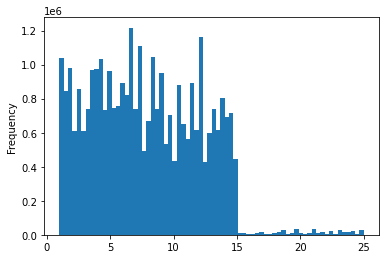

In [50]:
#saving the histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [52]:
# exporting the histogram
hist.figure.savefig(os.path.join (path,'04 Analysis','Visualizations', 'hist_prices.png'))

## 05. Creating Line Charts

In [23]:
# creating a smaller data sets, because it could be that my RAM is to small
df = ords_prods_merge[:2000000]

In [24]:
df

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range products,Regularly busy,Regularly busy,Average orders,10,New customer,6.320000,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range products,Regularly busy,Least busy,Average orders,10,New customer,5.900000,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.640000,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range products,Least busy,Least busy,Average orders,10,New customer,5.200000,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range products,Least busy,Least busy,Most orders,10,New customer,7.125000,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,183520,205921,2,1,9,30.0,24852,9,0,Banana,...,Mid-range products,Regularly busy,Busiest days,Most orders,7,New customer,7.655556,Low spender,30.0,Non-frequent customer
1999996,3315075,205923,1,3,17,NaN,24852,1,0,Banana,...,Mid-range products,Regularly busy,Least busy,Most orders,11,Regular customer,7.200000,Low spender,14.0,Regular customer
1999997,2672941,205928,1,6,13,NaN,24852,1,0,Banana,...,Mid-range products,Regularly busy,Regularly busy,Most orders,3,New customer,7.966667,Low spender,18.0,Regular customer
1999998,3235789,205928,2,3,15,18.0,24852,1,1,Banana,...,Mid-range products,Regularly busy,Least busy,Most orders,3,New customer,10.284615,High spender,18.0,Regular customer


## 05a. Sampling Data

#### Because we have such a big datafram we want to sample randomized rows. It needs to be a random assortment taken from all throughout the dataframe

#### A standard approach in machine learnin:. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.

In [25]:
# creating a random 0.7 sample (list) of the whole dataframe
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

#### 1. Set the seed for the random number generator. [eg 4]
#### 2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1. [len(ords_prods_merge); but this could be any number]
#### 3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7). [The output of True of False is based on whether it's less than or equal to 0.7 -> this means 70% of 'ords_prods_merge' are stored in 'dev' with a uniform value for True and False and the same is true for the 30%]
#### 4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).
#### .random makes sure that the random numbers created follow the uniform distribution
#### If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows.

In [27]:
# store 70% of the sample in the dataframe big (=True)
big = ords_prods_merge[dev]

In [28]:
# store 30% of the sample in the dataframe small (=False)
small = ords_prods_merge[~dev]

In [29]:
len(ords_prods_merge)

32404859

In [30]:
len(big) + len(small)

32404859

In [31]:
# creating a subset with the relevant columns for my analysis
df_2 = small[['order_day_of_week','prices']]

In [32]:
df_2

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


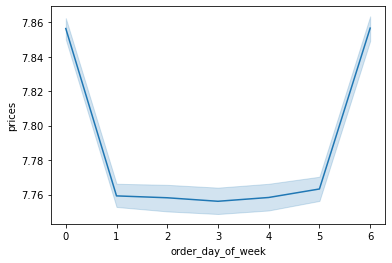

In [33]:
# creating a linechart from the small sample
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [36]:
# calculating price average for each 'order_day_of_week' for sample
df_2.groupby('order_day_of_week').agg({'prices':['mean']})

,prices
,mean
order_day_of_week,
0,7.856454
1,7.759224
2,7.758130
3,7.756089
4,7.758296
5,7.763234
6,7.856688


In [37]:
# calulating price average for each 'order_day_of_week' for complete df
ords_prods_merge.groupby('order_day_of_week').agg({'prices':['mean']})

,prices
,mean
order_day_of_week,
0,7.857590
1,7.759697
2,7.754309
3,7.757485
4,7.756223
5,7.762477
6,7.857431


In [38]:
# creating a subset with the relevant columns for my analysis
df_3 = big[['order_day_of_week','prices']]

In [39]:
df_3

,order_day_of_week,prices
1,3,9.0
4,4,9.0
5,2,9.0
7,1,9.0
8,1,9.0
...,...,...
32404854,2,3.7
32404855,5,3.7
32404856,2,6.9
32404857,3,6.9


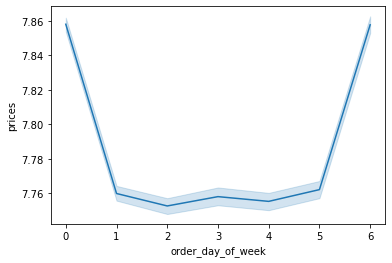

In [40]:
line_2 = sns.lineplot(data = df_3, x = 'order_day_of_week', y = 'prices')

In [41]:
# exporting the linechart 'line'
line.figure.savefig(os.path.join (path,'04 Analysis','Visualizations', 'line_prices_order_day_of_week.png'))